# NIHCXR Clinical Drift Experiments Tutorial

## Import Libraries and Load NIHCXR Dataset

In [1]:
from functools import partial

from monai.transforms import AddChanneld, Compose, Lambdad, Resized, ToDeviced
from torchxrayvision.models import DenseNet

from cyclops.data.loader import load_nihcxr
from cyclops.data.slicer import SliceSpec
from cyclops.data.utils import apply_transforms
from cyclops.monitor import ClinicalShiftApplicator, Detector, Reductor, TSTester
from cyclops.monitor.plotter import plot_drift_experiment, plot_drift_timeseries
from cyclops.monitor.utils import get_device

device = get_device()

nih_ds = load_nihcxr("/mnt/data/clinical_datasets/NIHCXR")

/home/amritk/.cache/pypoetry/virtualenvs/pycyclops-mhx6UJW0-py3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Example 1. Generate Source/Target Dataset for Experiments (1-2)

In [2]:
shifter = ClinicalShiftApplicator(
    "sex", source=None, target="F", shift_id="Patient Gender"
)
source_ds, target_ds = shifter.apply_shift(nih_ds, num_proc=6)

transforms = Compose(
    [
        AddChanneld(keys=("features",), allow_missing_keys=True),
        Resized(
            keys=("features",), spatial_size=(1, 224, 224), allow_missing_keys=True
        ),
        Lambdad(
            keys=("features",),
            func=lambda x: ((2 * (x / 255.0)) - 1.0) * 1024,
            allow_missing_keys=True,
        ),
        ToDeviced(keys=("features",), device=device, allow_missing_keys=True),
    ]
)

source_ds = source_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)
target_ds = target_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 73818.11 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 99789.69 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 120194.66 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 133486.79 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 141693.81 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 147796.40 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 77992.20 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 110653.14 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 129326.53 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 136136.26 examples/s]

Filter (num_proc=6):  83%|████████▎ | 92748/112120 [00:00<00:00, 132088.29 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 147139.32 examples/s]

## Example 2. Sensitivity test experiment with 3 dimensionality reduction techniques


Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.60 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.49 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.96 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.36 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.17 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.19 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.96 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.34 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.92 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.11 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.64 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.03 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.31 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.47 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.69 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.99 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.59 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.43 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.30 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.87 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.02 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.32 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.05 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 47.48 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 49.96 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 49.42 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.53 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.57 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.41 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 28.33 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 35.34 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.47 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.43 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 35.09 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 39.87 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 43.94 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 46.46 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 45.76 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.65 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.49 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.62 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.57 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.31 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.39 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 53.65 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.05 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.90 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.58 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.69 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 37.62 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.79 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.87 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.00 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.82 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 47.60 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 48.78 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 49.01 examples/s]

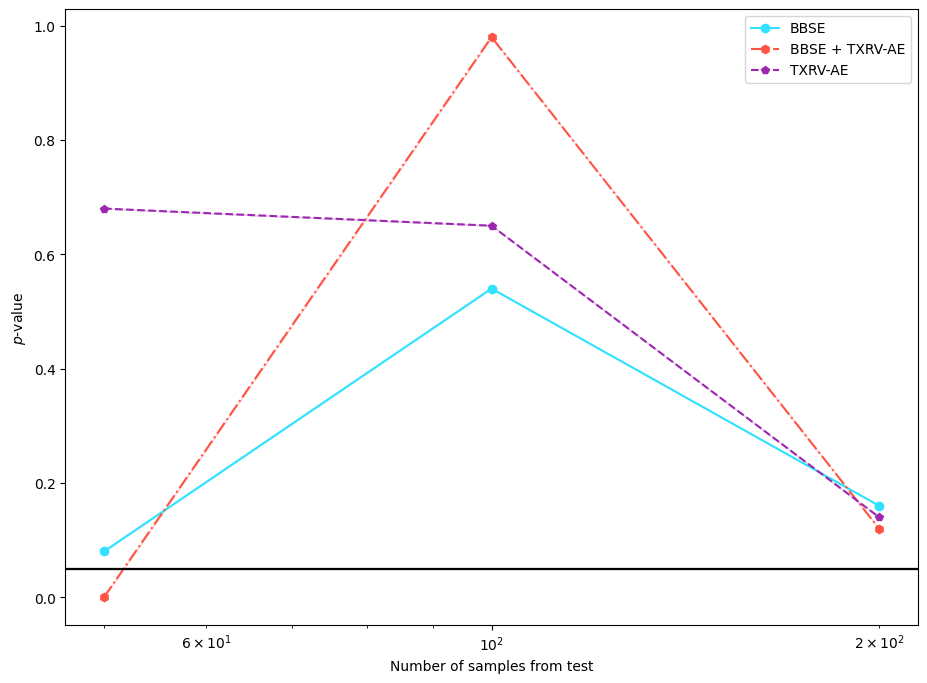

In [3]:
model = DenseNet(weights="densenet121-res224-all")
dr_methods = {
    "BBSE": "bbse-soft",
    "BBSE + TXRV-AE": "bbse-soft+txrv-ae",
    "TXRV-AE": "txrv-ae",
}
results = {}

for name, dr_method in dr_methods.items():
    if name == "TXRV-AE":
        reductor = Reductor(dr_method=dr_method, device=device)
    else:
        reductor = Reductor(dr_method=dr_method, model=model, device=device)
    detector = Detector(
        "sensitivity_test",
        reductor=reductor,
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    result = detector.detect_shift(source_ds, target_ds)
    results[name] = result
plot_drift_experiment(results)

## Example 3. Sensitivity test experiment with models trained on different datasets

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.79 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.23 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.68 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 49.23 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.12 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.92 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.58 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.83 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.37 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.45 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.81 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 36.19 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.30 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.73 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.57 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.02 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.95 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.26 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.11 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.91 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.32 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.14 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 49.04 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.03 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.47 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.40 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.23 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.20 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.04 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.65 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.21 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.26 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.13 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.21 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.29 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 48.97 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.91 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.22 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.70 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.36 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.06 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.68 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.23 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.74 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.80 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.36 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.45 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.17 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.05 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.21 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.48 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.87 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.34 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.21 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.38 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.78 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.78 examples/s]

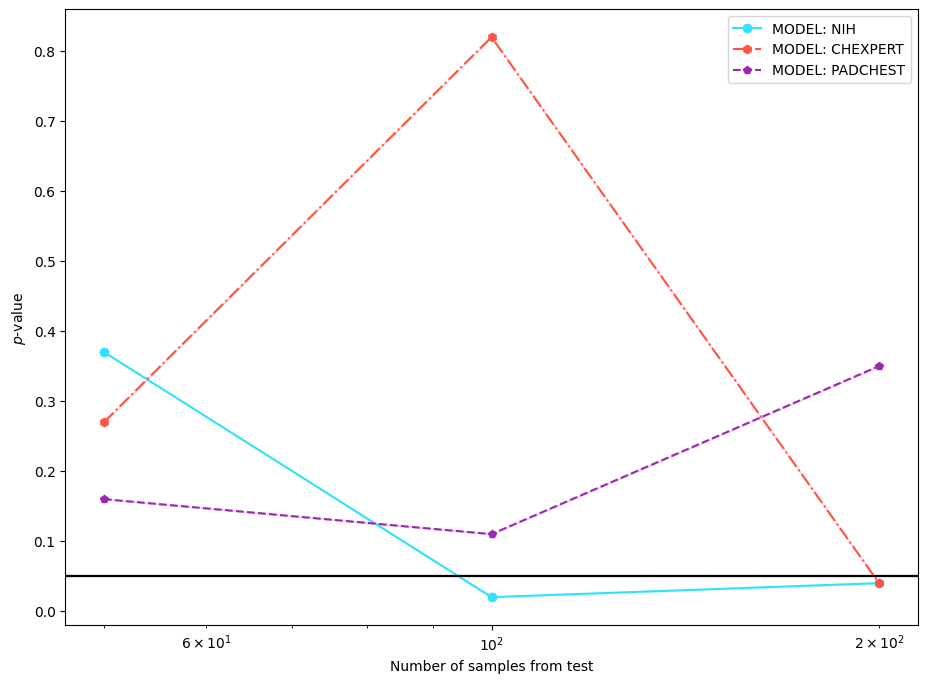

In [4]:
models = {
    "MODEL: NIH": "densenet121-res224-nih",
    "MODEL: CHEXPERT": "densenet121-res224-chex",
    "MODEL: PADCHEST": "densenet121-res224-pc",
}
results = {}

for model_name, model in models.items():
    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(
            dr_method="bbse-soft", model=DenseNet(weights=model), device=device
        ),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[model_name] = detector.detect_shift(source_ds, target_ds)
plot_drift_experiment(results)

## Example 4. Sensitivity test experiment with different clinical shifts

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 54505.46 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 81574.35 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 95396.90 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 103559.94 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 110506.27 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 113171.50 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 57490.06 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 83641.98 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 99437.31 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 108443.45 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 114627.26 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 119167.39 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.72 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.68 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.96 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.83 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.83 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.86 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.42 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.47 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.23 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.85 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.19 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.91 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.82 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.68 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 37.87 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.35 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 49.03 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.60 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.24 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 50886.77 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 71370.26 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 85337.16 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 97464.94 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 103381.02 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 108085.47 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 50897.81 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 71764.06 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 82221.64 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 92380.82 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 101237.83 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 109045.97 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.75 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.75 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.62 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.89 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.62 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.58 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.23 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.08 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.00 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.20 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.76 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.10 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.50 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.74 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.35 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.46 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.51 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.52 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.15 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 58294.69 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 82882.71 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 91604.77 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 107528.60 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 114818.71 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 116608.82 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 54005.22 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 76224.70 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 86725.05 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 94380.45 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 100614.60 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 106907.93 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.82 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.14 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.50 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.44 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.48 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.68 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.19 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.60 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.12 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.47 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.04 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.56 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.44 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.28 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.97 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.50 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.81 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.24 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.50 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 52825.69 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 72166.19 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 88072.31 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 99158.32 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 101502.74 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 113473.41 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 57583.78 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 76030.37 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 91659.58 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 102066.77 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 101402.46 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 111996.13 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.28 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.54 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.65 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.38 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.52 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.55 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.51 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.12 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.03 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.45 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.07 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.75 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.39 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.16 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.46 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.79 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.43 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.83 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.56 examples/s]

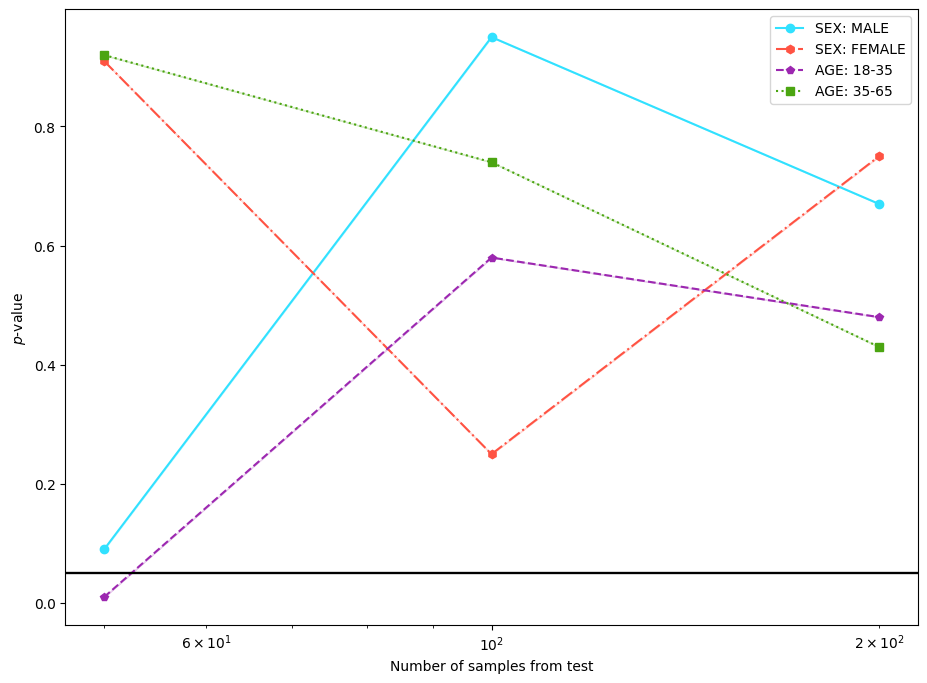

In [5]:
model = DenseNet(weights="densenet121-res224-all")
source_slice = None
target_slices = {
    "SEX: MALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "M"}}]),
    "SEX: FEMALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "F"}}]),
    "AGE: 18-35": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 18, "max_value": 35}}]
    ),
    "AGE: 35-65": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 35, "max_value": 65}}]
    ),
}
results = {}

for name, target_slice in target_slices.items():
    source_slice = None
    shifter = ClinicalShiftApplicator(
        "custom", source=source_slice, target=target_slice
    )
    ds_source, ds_target = shifter.apply_shift(nih_ds, num_proc=6)

    ds_source = ds_source.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )
    ds_target = ds_target.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )

    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[name] = detector.detect_shift(ds_source, ds_target)
plot_drift_experiment(results)

## Example 5. Rolling window experiment with synthetic timestamps using biweekly window

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.51 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.70 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.66 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.37 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.46 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.39 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.93 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.54 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.79 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.35 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.66 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.38 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.42 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.93 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.53 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.08 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.65 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.93 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.39 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.14 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.56 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.03 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.76 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.03 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.59 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.38 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.36 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.41 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.57 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.97 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.94 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.47 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.64 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.20 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.27 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.46 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.48 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.95 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.11 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.50 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.77 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.30 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.77 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.56 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.84 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.43 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.66 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.36 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.34 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.56 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.80 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.91 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.95 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.61 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.88 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.53 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.45 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.55 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.99 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.80 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.44 examples/s]

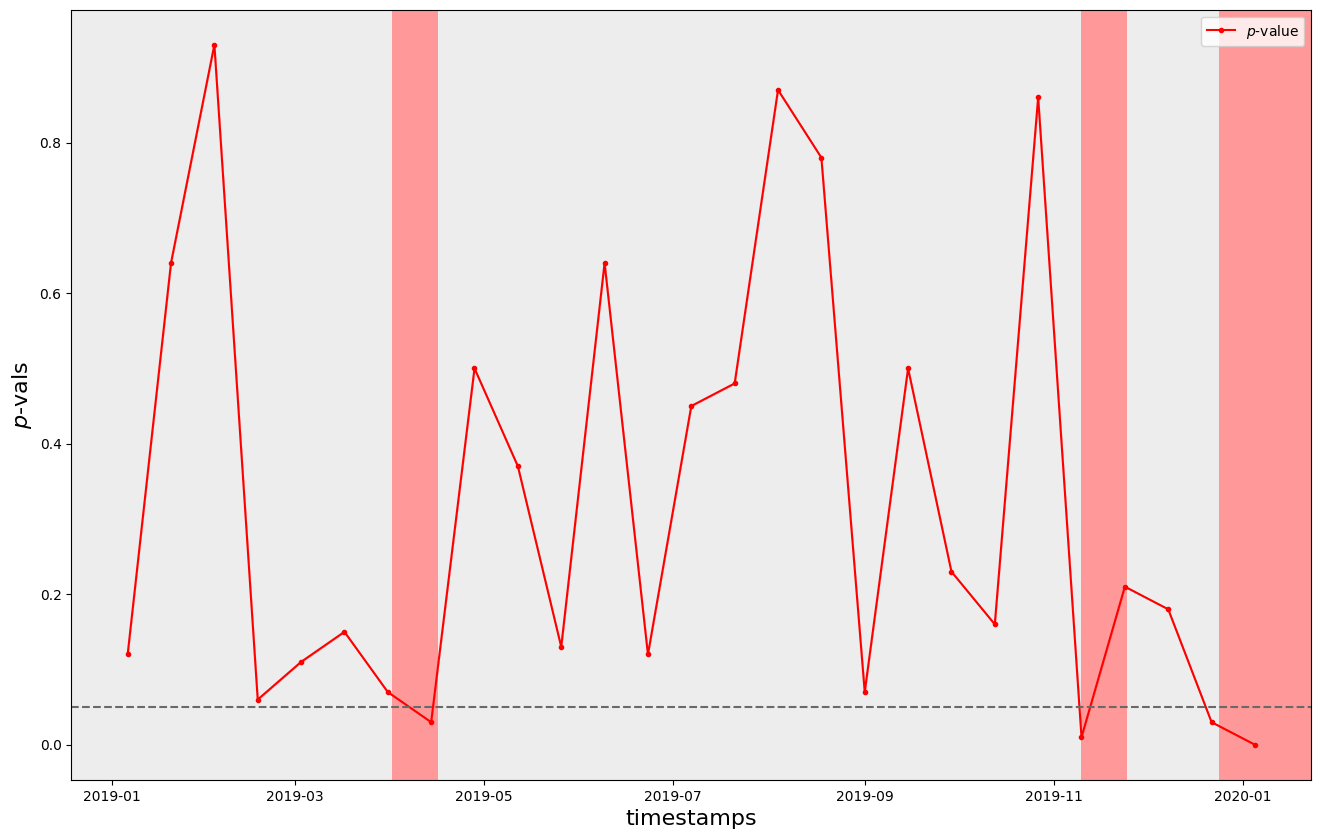

In [6]:
model = DenseNet(weights="densenet121-res224-all")
detector = Detector(
    "rolling_window_drift",
    reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
    tester=TSTester(tester_method="mmd"),
    source_sample_size=200,
    target_sample_size=50,
    timestamp_column="timestamp",
    window_size="2W",
)

results = detector.detect_shift(source_ds, target_ds)
plot_drift_timeseries(results)